Ford Gobike Data Exploration

by Peiru Cai

Investigation Overview

Bay Wheels (previously known as Ford GoBike) is 'the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States.This document will explore a dataset which contain approximately 183.412 Fordgobike trip data for better analyze people's bike usage habits and behavior characteristics. 

In [1]:
#import all the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# check the data shape and data type 
print(df.shape)
print(df.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [5]:
#overview the top 10 raws of the dataset
print(df.head(10))

   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   
5          1793  2019-02-28 23:49:58.6320  2019-03-01 00:19:51.7600   
6          1147  2019-02-28 23:55:35.1040  2019-03-01 00:14:42.5880   
7          1615  2019-02-28 23:41:06.7660  2019-03-01 00:08:02.7560   
8          1570  2019-02-28 23:41:48.7900  2019-03-01 00:07:59.7150   
9          1049  2019-02-28 23:49:47.6990  2019-03-01 00:07:17.0250   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [7]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
df.duplicated().sum()

0

Assessing Summary

There are no duplicate values or null values

A lot of datatypes need to be changed

Data Cleaning

Copying the original dataset

In [9]:
#create copy of original dataframe
df_clean=df.copy()

1.

Define:Chaning the datatypes of many columns

Code:

In [10]:
# converting use_type to categorical
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')

In [11]:
#coverting 3 columns to string
df_clean['start_station_id'] = df_clean['start_station_id'].astype('str')
df_clean['end_station_id'] = df_clean['end_station_id'].astype('str')
df_clean['bike_id'] =df_clean['bike_id'].astype('str')

In [12]:
#coverting the format of start_time& end_time to int64
df_clean.start_time=pd.to_datetime(df_clean.start_time)
df_clean.end_time=pd.to_datetime(df_clean.end_time)

Test:

In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

In [14]:
#change the data type for bike_share_for_all_trip to be bool
df_clean.bike_share_for_all_trip=(df_clean.bike_share_for_all_trip=='Yes')

2. 

Define: 

Remove all the redundant raws taht we do not need  

Code

In [15]:
#remove raws that does not have gender value
df_clean=df_clean[df_clean['member_gender'].isnull()==False]

In [16]:
#Remove all raws without start_station_id
df_clean=df_clean[df_clean['start_station_id'].isnull()==False]

Test

In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             175147 non-null  int64         
 1   start_time               175147 non-null  datetime64[ns]
 2   end_time                 175147 non-null  datetime64[ns]
 3   start_station_id         175147 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   175147 non-null  float64       
 6   start_station_longitude  175147 non-null  float64       
 7   end_station_id           175147 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     175147 non-null  float64       
 10  end_station_longitude    175147 non-null  float64       
 11  bike_id                  175147 non-null  object        
 12  user_type       

3.

Define:

Making separte colums for hour, day and week 

Code

In [18]:
df_clean['duration_minute'] = df_clean['duration_sec']/60

df_clean['start_date'] = df_clean.start_time.dt.strftime('%Y-%m-%d')
df_clean['start_hour_of_day'] = df_clean.start_time.dt.strftime('%H')
df_clean['start_day_of_week'] = df_clean.start_time.dt.strftime('%A')
df_clean['month'] = df_clean.start_time.dt.strftime('%B')

Test

In [19]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,start_date,start_hour_of_day,start_day_of_week,month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,False,869.750000,2019-02-28,17,Thursday,February
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,False,1030.900000,2019-02-28,12,Thursday,February
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,False,608.166667,2019-02-28,17,Thursday,February
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,True,26.416667,2019-02-28,23,Thursday,February
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959.0,Male,False,29.883333,2019-02-28,23,Thursday,February


In [20]:
df_clean.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,start_date,start_hour_of_day,start_day_of_week,month
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,...,4832,Subscriber,1996.0,Male,False,8.000000,2019-02-01,00,Friday,February
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,...,4960,Subscriber,1984.0,Male,False,5.216667,2019-02-01,00,Friday,February
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,...,3824,Subscriber,1990.0,Male,True,2.350000,2019-02-01,00,Friday,February
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,...,5095,Subscriber,1988.0,Male,False,2.316667,2019-02-01,00,Friday,February
183411,271,2019-02-01 00:00:20.636,2019-02-01 00:04:52.058,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,...,1057,Subscriber,1989.0,Male,False,4.516667,2019-02-01,00,Friday,February


4.

Define

Calculate age of member

In [21]:
#substract the member_birth_year from 2019
df_clean['member_age']=2019-df_clean['member_birth_year']

Test

In [22]:
df_clean.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,start_date,start_hour_of_day,start_day_of_week,month,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,False,869.750000,2019-02-28,17,Thursday,February,35.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,False,1030.900000,2019-02-28,12,Thursday,February,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,False,608.166667,2019-02-28,17,Thursday,February,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,True,26.416667,2019-02-28,23,Thursday,February,45.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,False,29.883333,2019-02-28,23,Thursday,February,60.0


5. 

Define

Remove the outliers from duration_minute

In [23]:
df_clean= df_clean.query('duration_minute <= 100')
df_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174442 entries, 4 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174442 non-null  int64         
 1   start_time               174442 non-null  datetime64[ns]
 2   end_time                 174442 non-null  datetime64[ns]
 3   start_station_id         174442 non-null  object        
 4   start_station_name       174249 non-null  object        
 5   start_station_latitude   174442 non-null  float64       
 6   start_station_longitude  174442 non-null  float64       
 7   end_station_id           174442 non-null  object        
 8   end_station_name         174249 non-null  object        
 9   end_station_latitude     174442 non-null  float64       
 10  end_station_longitude    174442 non-null  float64       
 11  bike_id                  174442 non-null  object        
 12  user_type       

Test

In [24]:
df_clean.duration_minute.describe()

count    174442.000000
mean         10.567679
std           8.466683
min           1.016667
25%           5.366667
50%           8.483333
75%          13.066667
max          99.766667
Name: duration_minute, dtype: float64

What is the structure of your dataset?

The orignial combined data contains approximately 1,834,12 individual trip records with 16 variables collected, which happen in 2019 in the San Francisco Bay Area. The dataset contained features about:

1. trip duration:duration_sec,start_time,end_time

2. stations:start/end station, name, geolocation(latitude/longitude)

3. member info (anonymized): bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip

Added or derived varaible to support data exploration:

1. trip info: month, day, hour of the day, weekday(both for start and end time)

2. member age

What is/are the main feature(s) of interest in your dataset?

 I am most interested in exploring the bike trips' duration, as well as the characteristics of the riders (their gender, age, and whether they are memberships of casual users) . Therefore, the questions are: Which day of the week and which specific time of day that the bicycles should be most available?What kind of customer group is the group with the highest frequency of renting bicycles? Average trip duration of subscribers vs customers？
 

What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The following features will support my investigations into the feature I am interested.

1. start_day_of_week & start_hour_of_day: help us understand the trip distribution over day hours or day week

2. user_type,member_gender & age : will help us find out who belongs to the main target customer group 

3. duration_sec & user_type:will help us know their journey time

Univariate Exploration

In this section, I investigate distributions of individual variable. 

1.The Monthly Usage of Bike Rides

In [25]:
#Removing the rainbow colors and setting to the variable no_color
base_color=sb.color_palette()[0]

In [26]:
#convert the data type of new added columns
df_clean['start_day_of_week'] = df_clean['start_day_of_week'].astype("category")
df_clean['start_hour_of_day'] = df_clean['start_hour_of_day'].astype("category")

In [27]:
df_clean.sort_values('start_hour_of_day', inplace=True, ascending= False)

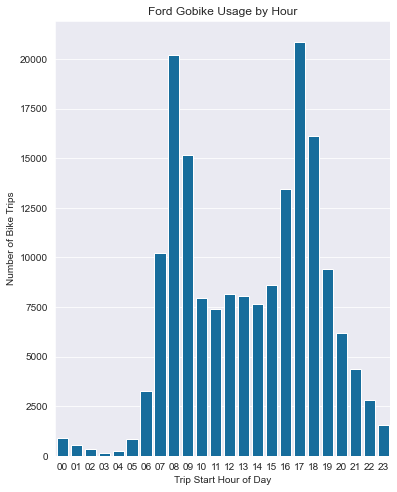

In [28]:
#trip distribution over day hours
plt.rcParams['figure.figsize'] = 6, 8
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

sb.countplot(data=df_clean, x='start_hour_of_day', color=base_color);
plt.title('Ford Gobike Usage by Hour');
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Number of Bike Trips');

During a typical peak period, the trip distribution over day hours around two time ranges, which is from 8am to 9am and from 17pm to 18pm.

In [29]:
#check the data type of new added columns
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174442 entries, 4 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174442 non-null  int64         
 1   start_time               174442 non-null  datetime64[ns]
 2   end_time                 174442 non-null  datetime64[ns]
 3   start_station_id         174442 non-null  object        
 4   start_station_name       174249 non-null  object        
 5   start_station_latitude   174442 non-null  float64       
 6   start_station_longitude  174442 non-null  float64       
 7   end_station_id           174442 non-null  object        
 8   end_station_name         174249 non-null  object        
 9   end_station_latitude     174442 non-null  float64       
 10  end_station_longitude    174442 non-null  float64       
 11  bike_id                  174442 non-null  object        
 12  user_type       

In [30]:
#convert the data type of new added columns
df_clean['start_day_of_week'] = df_clean['start_day_of_week'].astype("category")

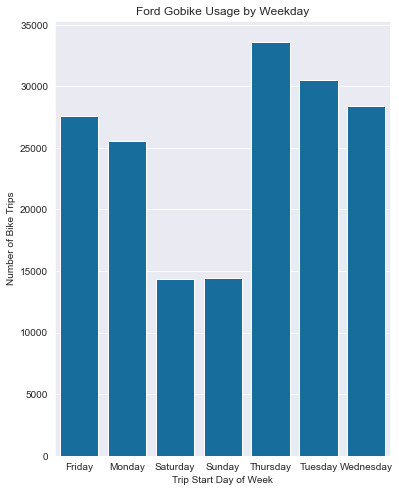

In [31]:
# Weekday usage of the Ford Go bike system
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.countplot(data=df_clean, x='start_day_of_week', color=base_color);
plt.title('Ford Gobike Usage by Weekday');
plt.xlabel('Trip Start Day of Week');
plt.ylabel('Number of Bike Trips');

Based on the distribution of the itinerary on a certain day of the week, it's obviouse that most of the itineraries take place on weekday(Mon-Fri), and the main purpose may be commnuting.

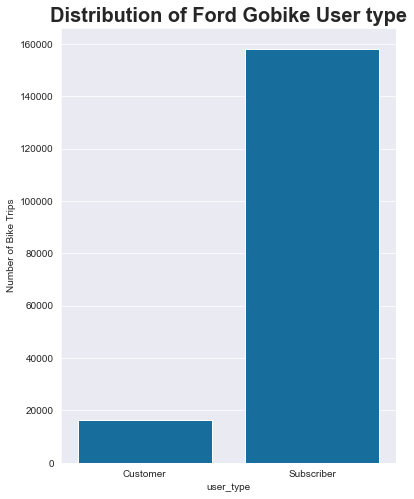

In [32]:
sb.countplot(data=df_clean,x='user_type',color=base_color);
plt.xlabel('user_type');
plt.ylabel('Number of Bike Trips');
plt.title('Distribution of Ford Gobike User type',fontsize=20,fontweight='bold');


From the data analysis charts above, it can be seen that most riders are male subscribers.

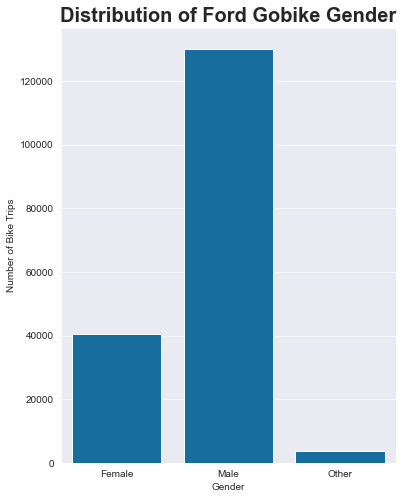

In [33]:
sb.countplot(data=df_clean, x='member_gender', color=base_color);
plt.xlabel('Gender');
plt.ylabel('Number of Bike Trips');
plt.title('Distribution of Ford Gobike Gender',fontsize=20,fontweight='bold');

It seems that male users are the highest group using shared bicycles, which is almost three times as many as female.

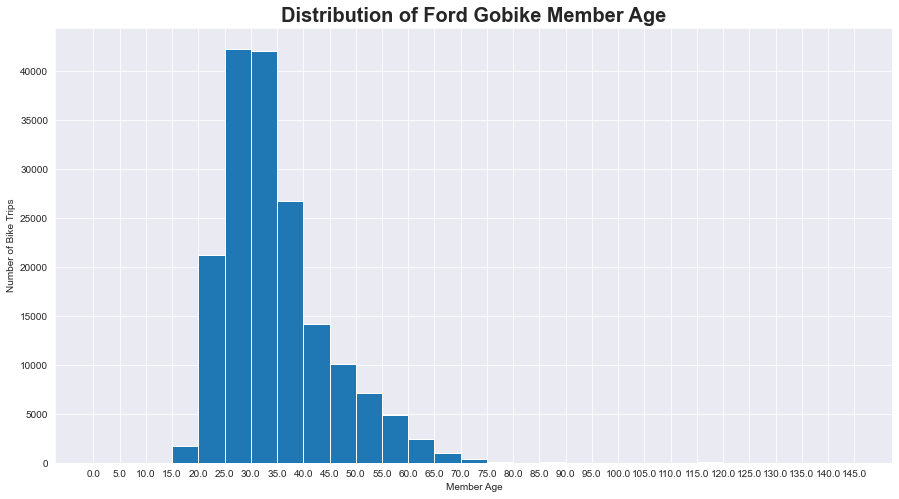

In [34]:
plt.figure(figsize=(15, 8))
bins = np.arange(0, df_clean['member_age'].max()+5, 5)
plt.hist(data=df_clean, x='member_age', bins=bins);
plt.xticks(bins, bins);
plt.xlabel('Member Age');
plt.ylabel('Number of Bike Trips');
plt.title('Distribution of Ford Gobike Member Age',fontsize=20,fontweight='bold');

Observation

Most of the users age are between 25-40 years old.


In [35]:
df_clean.duration_minute.describe()

count    174442.000000
mean         10.567679
std           8.466683
min           1.016667
25%           5.366667
50%           8.483333
75%          13.066667
max          99.766667
Name: duration_minute, dtype: float64

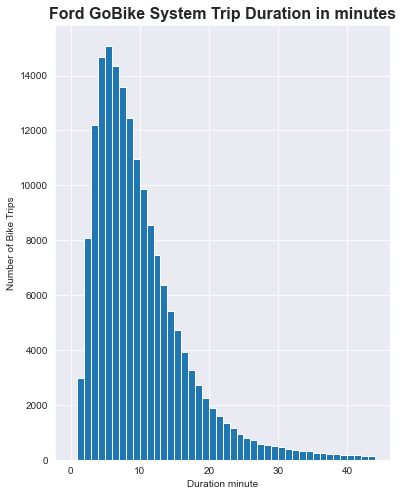

In [36]:
bin_edges = np.arange(0, 45, 1)
plt.hist(data = df_clean, x = 'duration_minute', bins = bin_edges);
plt.title("Ford GoBike System Trip Duration in minutes", y=1, fontsize=16, fontweight='bold');
plt.xlabel('Duration minute');
plt.ylabel('Number of Bike Trips');

Observation

Through the histogram, we found that most riders are in the range of 3-12 mins.This indicates that they are riding short distances. 

Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

There wasn't unusaul points.The only thing that needs to be converted is the data type of the new columns.

Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Based on the above histgram, we found that most riders are in the range of 3-12 mins, which indicates that they are riding short distances. 

Bivariate Exploration

1. User age by weekdays

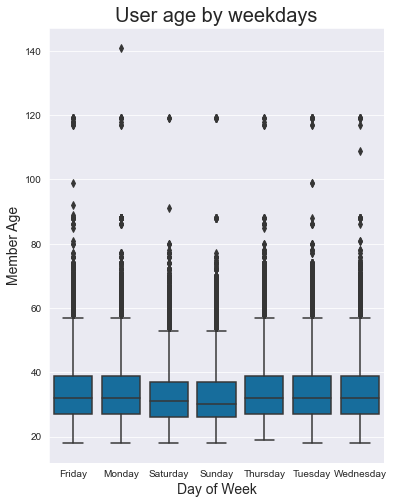

In [37]:
import matplotlib.pyplot as plt
sb.boxplot(data=df_clean, x='start_day_of_week', y='member_age', color=base_color)
plt.xlabel('Day of Week',fontsize=14);
plt.ylabel('Member Age',fontsize=14);
plt.title('User age by weekdays',fontsize=20);

Observation

It seems that the member who rided bicycles at weekdays are slightly older than those people who rided on weekend. But there is an outlier in the column on Monday.

1.  Average minute of duration between customers and subscribers

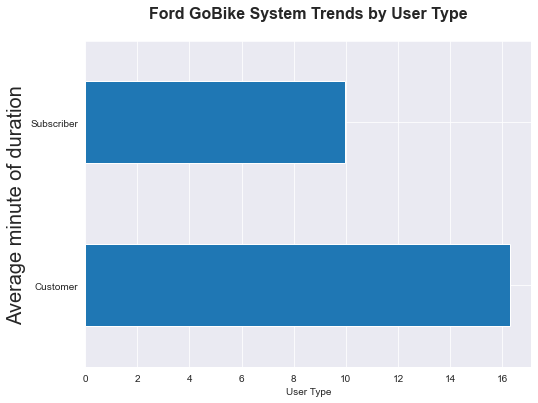

In [38]:
# What is the difference in travel time distribution between customers and subscribers?
plt = df_clean.groupby('user_type')['duration_minute'].mean().plot(kind='barh', figsize=(8,6));

plt.set_title('Ford GoBike System Trends by User Type', y=1.05, fontsize=16, fontweight='bold');
plt.set_xlabel('User Type');
plt.set_ylabel('Average minute of duration',fontsize=20);

Observation

The average minute traveled by subscriber is slightly less than customers, which implies that the commuting distance for the subscriber is less than the customer too.The trip duration distribution for customers is almost twice as long as that of subscribers.

Bike usage during the day between customer and subscriber

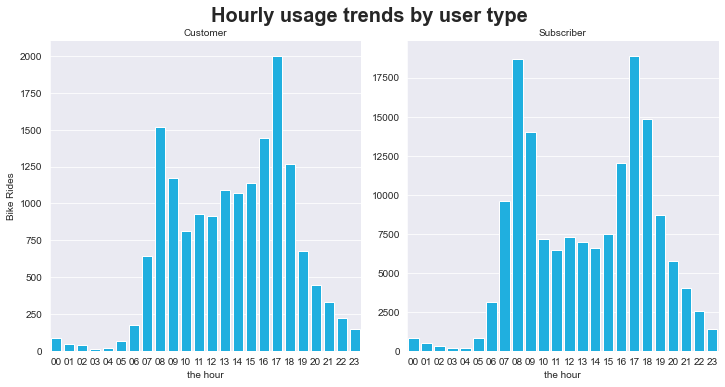

In [39]:
g = sb.catplot(data=df_clean, x='start_hour_of_day', col="user_type", kind='count', sharey = False,
            color = 'deepskyblue')
g.set_axis_labels("the hour", "Bike Rides")
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage trends by user type', y=1.03,fontsize=20, fontweight='bold');

Observation 

The number of sharing bike used by subscribers far exceeds the number of sharing bike used by customers during the day. Furthermore, 7 am-9 am vs 16 pm-18 pm are the times when the number of bicycles is the most in a day. In addition, the peak period is at 8 in the morning and 5 in the afternoon separately.

Car usage during the week between customer and subscriber

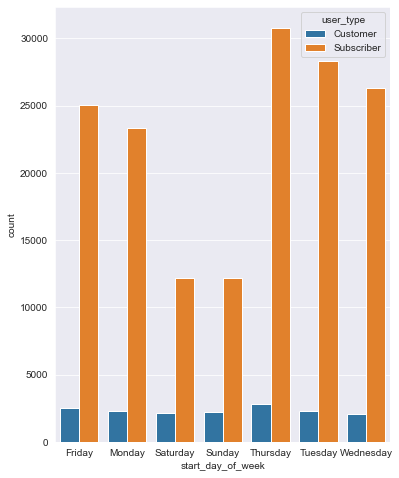

In [40]:
sb.countplot(data=df_clean, x='start_day_of_week', hue='user_type');
plt.set_xlabel('Day of Week');
plt.set_ylabel('Count');
plt.set_title('Usage of Different User Types by Weekly',fontsize=16, fontweight='bold');

Observation

The number of sharing bike used by subscribers far exceeds the number of sharing bike used by customers during the week. 

Trip Duration in Minute by gender

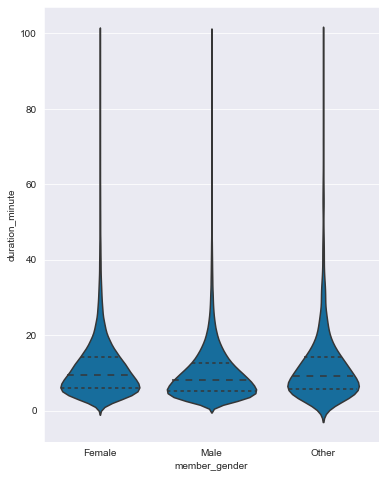

In [41]:
sb.violinplot(data=df_clean, x='member_gender', y='duration_minute', color=base_color, inner='quartile');
plt.set_xlabel('Gender');
plt.set_ylabel('Trip Duration in Minute');

Observation 

From the above violin chart, we can see that the difference is not too huge among the genders. But,comparing with female users, males seems take shorter time, which demonstrated by the IQR.

Comparison of bike usage time on weekends and weedays

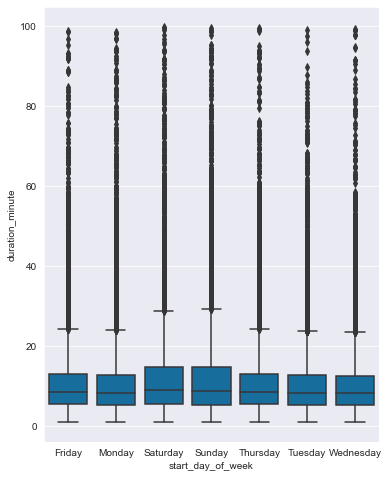

In [42]:
sb.boxplot(data=df_clean, x='start_day_of_week', y='duration_minute', color=base_color);
plt.set_xlabel('start_day_of_week');
plt.set_ylabel('duration_minute');
plt.set_title('Comparison of bike usage time on weekends and weedays');

Observation

Comparing with bicycle riding on the weekdays, bicycle riding on weekends have longer durations.


Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

 Based on the above analysis, I draw the following conclusions: 1.Subscribers use bicycles much more than customers. 2. The average riding time of female cyclists is longer than that of male cyclists. 3. Compared with the subscriber, Customer spends more time on the bicycle on average. 4. Compared with other time periods, the average duration of cycling from 5:00 am to 6:00 pm is the longest. 5.The frequency of using bikes on weekday is much higher than that on weekends.  

Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

1.Monday to Friday is the peak time for bike use during the weekday. 2.The number of sharing bike used on Monday and Friday is less than Tuesday to Thursday. 3.In general, the use time of shared bicycles from Monday to Friday is not much differences.

Multivariate Exploration

In this part of the analysis, the main content I want to explore the relationship among different variables.

Bike renting by gender

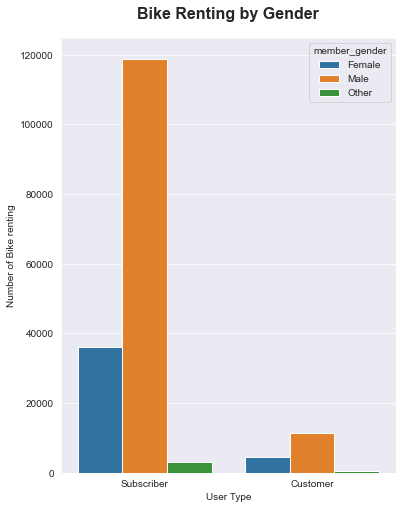

In [43]:
g = sb.countplot(data=df_clean, x="user_type", hue="member_gender", order=df_clean.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('Number of Bike renting')
g.set_title('Bike Renting by Gender', y=1.03, fontsize=16, fontweight='semibold');

Observation

The bar chart above demonstrate that male subscribers and female subscribers are more than customer user type. However, from the perspective of these two types of users, it seems that men use the service more often than women.

In [44]:
df_clean.duration_sec.max()

5986

Trip Duration, Gender and Age

<Figure size 576x432 with 0 Axes>

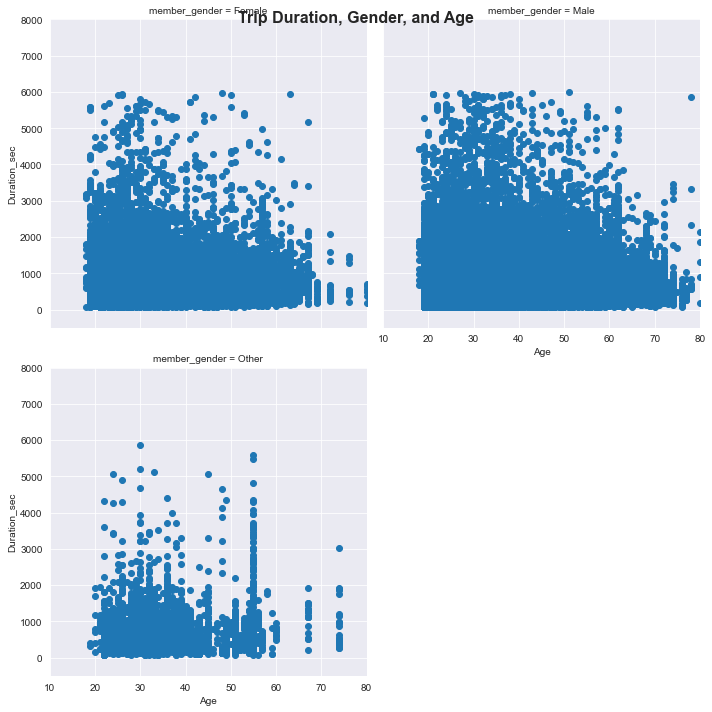

In [45]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = [8,6]);
gender = sb.FacetGrid(data = df_clean, col = 'member_gender', col_wrap = 2, height = 5,
                 xlim = [10, 80], ylim = [-500, 8000])
gender.map(plt.scatter, 'member_age', 'duration_sec', alpha= 1)


gender.set_xlabels('Age')
gender.set_ylabels('Duration_sec')
gender.fig.suptitle('Trip Duration, Gender, and Age', fontsize=16, fontweight='bold')
plt.show();

Observation

I observe that the duration time trends of male and femaleare similar, and the duration time decreases with age. For others, the 60-years-old travel time has reached its peak. 

Weekly Bike Trends by User Type and Gender

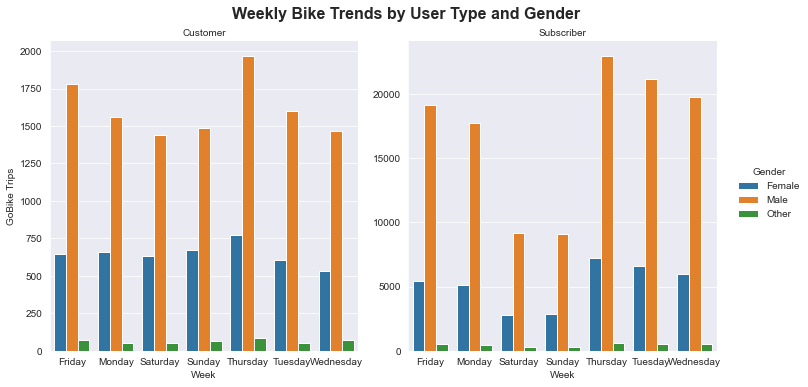

In [46]:
g = sb.catplot(data=df_clean, x='start_day_of_week', col="user_type", hue="member_gender", kind='count', sharey = False)
g.set_axis_labels("Week", "GoBike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Weekly Bike Trends by User Type and Gender', y=1.03, fontsize=16, fontweight='bold');

Observation

Male use GoBike the most, follow by female and others. The number of GoBike used reaches its peak on Thursday. In addition, male use almost twice as many as female.

Hourly Usage during the Week for Different User Types

<Figure size 432x576 with 0 Axes>

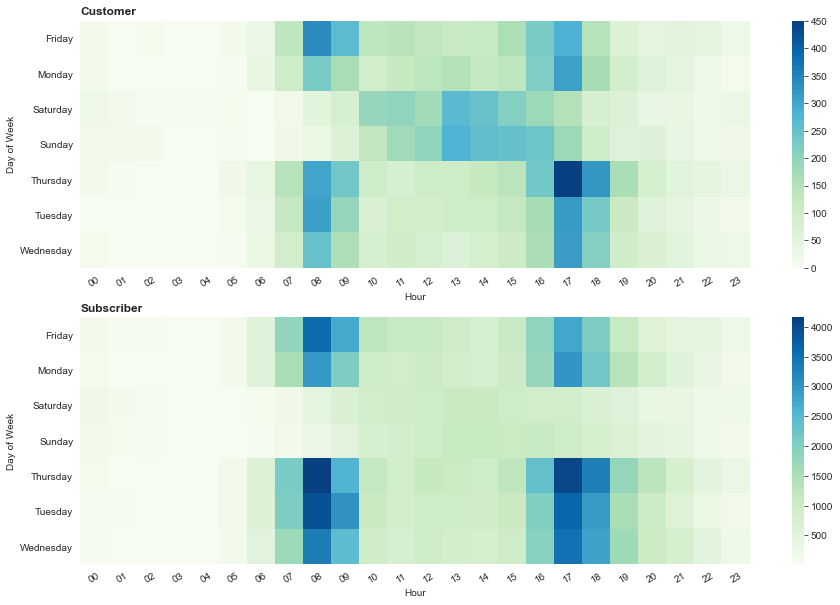

In [47]:
plt.suptitle('Hourly Usage during the Week for Different User Types')
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
customers = df_clean.query('user_type == "Customer"')
customer_counts = customers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
customer_counts = customer_counts.reset_index(name='count')
customer_counts = customer_counts.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(customer_counts, cmap='GnBu');
plt.title('Customer', loc='left',fontsize=12, fontweight='bold');
plt.xlabel('Hour');
plt.xticks(rotation=30);
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
subscribers = df_clean.query('user_type == "Subscriber"')
subscribers_counts = subscribers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
subscribers_counts = subscribers_counts.reset_index(name='count')
subscribers_counts = subscribers_counts.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(subscribers_counts, cmap='GnBu');
plt.title('Subscriber', loc='left',fontsize=12, fontweight='bold');
plt.xlabel('Hour');
plt.xticks(rotation=30);
plt.ylabel('Day of Week');


The heatmap above clearly shows the different usage behavior between the two types of users. On general, the customer use sharing bikes on weekend (Sunday and Saturday), while the subscriber ride bikes on weekdays. 5 pm and 8 am are the peak periods for bike use on Thursday.

Project Summary

• The exploration above demonstrate that both types of users will use the bicycle service between 7 am to 9 am, and 4 pm-6 pm, especially the age between 20-50 use the system more.
• Subscribers use bicycles much more than customers. 
• The average riding time of female cyclists is longer than that of male cyclists. 
• Subscribers tended to have much shorter/quicker trips compared to customers which makes subscriber usage more efficient.
• Compared with other time periods, the average duration of cycling from 5:00 am to 6:00 pm is the longest.
• The frequency of using bikes on weekdays is much higher than that on weekends. 
• The interaction among the variables is complementary to each other, and the combination is definitely meaningful and interesting. 
• Furthermore, every Thursday is the peak period of bicycle use is a big surprise.

In [2]:
!jupyter nbconvert notebook_presentation.ipynb --to slides --post serve  --no-input --no-prompt 

[NbConvertApp] Converting notebook notebook_presentation.ipynb to slides
[NbConvertApp] Writing 1043812 bytes to notebook_presentation.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\ACCENT\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\ACCENT\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\ACCENT\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\ACCENT\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\ACCENT\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_filena